<a href="https://colab.research.google.com/github/tykimos/tykimos.github.io/blob/master/_writing/2017-7-9-Training_Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
layout: post
title:  "학습과정 살펴보기"
author: 김태영
date:   2017-07-09 23:00:00
categories: Lecture
comments: true
image: http://tykimos.github.io/warehouse/2017-7-9-Training_Monitoring_1.png
---

케라스로 딥러닝 모델 개발할 때, 가장 많이 보게 되는 것이 fit 함수가 화면에 찍어주는 로그입니다. 이 로그에 포함된 수치들은 학습이 제대로 되고 있는 지, 학습을 그만할 지 등 판단하는 중요한 척도가 됩니다. 수치 자체도 큰 의미가 있지만 수치들이 에포코마다 바뀌는 변화 추이를 보는 것이 중요하기 때문에 그래프로 표시하여 보는 것이 더 직관적입니다. 이러한 수치를 그래프로 보기 위해 케라스에서 제공하는 기능을 이용하는 방법, 텐서보드와 연동하여 보는 방법, 콜백함수를 직접 만들어서 사용하는 방법에 대해서 알아보겠습니다.

* 히스토리 기능 사용하기
* 텐서보드와 연동하기
* 직접 콜백함수 만들어보기

---

### 히스토리 기능 사용하기

케라스에서 학습시킬 때 fit() 함수를 사용합니다. 이 함수의 반환 값으로 히스토리 객체를 얻을 수 있는데, 이 객체는 다음의 정보를 담고 있습니다. 

* 매 에포크 마다의 훈련 손실값 (loss) 
* 매 에포크 마다의 훈련 정확도 (acc)
* 매 에포크 마다의 검증 손실값 (val_loss)
* 매 에포크 마다의 검증 정확도 (val_acc)

히스토리 기능은 케라스의 모든 모델에 탑재되어 있으므로 별도의 설정없이 fit() 함수의 반환으로 쉽게 얻을 수 있습니다. 사용법은 다음과 같습니다.

In [ ]:
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

print(hist.history['loss'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])

수치들은 각 에포크마다 해당 값이 추가되므로 배열 형태로 저장되어 있습니다. 이러한 수치들을 매 에포크마다 변화되는 추이를 그래프로 표시하여 비교하면서 보면 학습 상태를 직관적으로 이해하기 쉽습니다. 아래 코드와 같이 matplotlib 패키지를 이용하면 하나의 그래프로 쉽게 표시할 수 있습니다.  

- train_loss(노란색) : 훈련 손실값이며 x축은 에포크 수, 좌측 y축은 손실값을 나타냅니다.
- val_loss(빨간색) : 검증 손실값이며 x축은 에포크 수, 좌측 y축은 손실값을 나타냅니다.
- train_acc(파란색) : 훈련 정확도이며 x축은 에포크 수, 우측 y축은 정확도를 나타냅니다.
- val_acc(녹색) : 검증 정확도이며 x축은 에포크 수, 우측 y축은 정확도를 나타냅니다.

좌측 세로축은 손실값을 표시하고, 우측 세로축은 정확도를 나타냅니다.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

손글씨 데이터셋인 MNIST를 다층 퍼셉트론 모델로 학습시키는 간단한 예제로 테스트 해보겠습니다. 전체 코드는 다음과 같습니다.

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s - loss: 2.3067 - acc: 0.1171 - val_loss: 2.2751 - val_acc: 0.0933
Epoch 2/1000
700/700 [==============================] - 0s - loss: 2.2731 - acc: 0.1257 - val_loss: 2.2508 - val_acc: 0.1267
Epoch 3/1000
700/700 [==============================] - 0s - loss: 2.2479 - acc: 0.1343 - val_loss: 2.2230 - val_acc: 0.1267
Epoch 4/1000
700/700 [==============================] - 0s - loss: 2.2220 - acc: 0.1471 - val_loss: 2.1984 - val_acc: 0.1233
Epoch 5/1000
700/700 [==============================] - 0s - loss: 2.1957 - acc: 0.1400 - val_loss: 2.1724 - val_acc: 0.1233
Epoch 6/1000
700/700 [==============================] - 0s - loss: 2.1685 - acc: 0.1457 - val_loss: 2.1513 - val_acc: 0.1133
Epoch 7/1000
700/700 [==============================] - 0s - loss: 2.1424 - acc: 0.1757 - val_loss: 2.1276 - val_acc: 0.1533
Epoch 8/1000
700/700 [==============================] - 0s - loss: 2.1174 - acc

Using Theano backend.


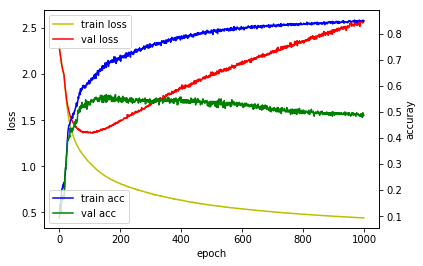

In [ ]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리
x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋과 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)
x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 라벨데이터 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=1000, batch_size=10, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

![png](http://tykimos.github.io/warehouse/2017-7-9-Training_Monitoring_output_7_2.png)


각 에포크에 대한 손실값, 정확도 추이를 보실 수가 있습니다. 검증셋의 손실값이 감소하다가 100번째 에포크에서 다시 증가되는 양상을 보입니다. 과적합(overfitting)이 발생했다고 보실 수가 있습니다. 이 경우 100번째 에포크만 학습시킨 모델이 1000번째 에포크까지 학습한 모델보다 실제 테스트에서 더 좋은 결과가 나올 수 있습니다.

---

### 텐서보드와 연동하기

텐서플로우에서는 텐서보드라는 훌륭한 학습 과정 모니터링 툴을 제공하고 있습니다. 텐서플로우 기반으로 케라스를 구동할 경우 이 텐서보드를 사용할 수 있습니다. 따라서 텐서보드를 이용하기 위해서는 먼저 백엔드를 케라스 설정 파일(keras.json)에서 텐서플로우로 지정해야 합니다. 단 경로는 설치 환경에 따라 차이가 날 수 있습니다. 

    vi ~/.keras/keras.json

keras.json 파일을 열어서 다음과 같이 수정합니다.

    {
        "image_data_format": "channels_last",
        "epsilon": 1e-07,
        "floatx": "float32",
        "backend": "tensorflow"
    }
    
여기서 중요한 인자는 `backend`이 입니다. 이 항목이 `tensorflow`로 지정되어 있어야 합니다. 연동하는 방법은 간단합니다. TensorBoard라는 콜백함수를 생성한 뒤 fit 함수 인자로 넣어주기만 하면 됩니다. TensorBoard 콜백함수 생성 시 `log_dir` 인자에 경로를 넣어야 하는데, 이 경로에 텐서보드와 정보를 주고 받을 수 있는 파일이 생성됩니다.

In [ ]:
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
model.fit(x_train, y_train, epochs=1000, batch_size=10, validation_data=(x_val, y_val), callbacks=[tb_hist])

동일한 예제로 이버에는 텐서보드를 통해 학습 과정을 모니터링 해보겠습니다. 전체 코드는 다음과 같습니다.

In [ ]:
# 0. 사용할 패키지 불러오기
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리
x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋과 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)
x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 라벨데이터 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
model.fit(x_train, y_train, epochs=1000, batch_size=10, validation_data=(x_val, y_val), callbacks=[tb_hist])

# 5. 학습과정 살펴보기
# 새로운 콘솔에서 가상환경을 실행하여 아래 명령으로 텐서보드를 띄웁니다.
# tensorboard --logdir=~/Projects/Keras/_writing/graph

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/1000
700/700 [==============================] - 0s - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/1000
700/700 [==============================] - 0s - loss: 2.1729 - acc: 0.1729 - val_loss: 2.1630 - val_acc: 0.1867
Epoch 4/1000
700/700 [==============================] - 0s - loss: 2.1440 - acc: 0.1786 - val_loss: 2.1371 - val_acc: 0.1867
Epoch 5/1000
700/700 [==============================] - 0s - loss: 2.1175 - acc: 0.1900 - val_loss: 2.1140 - val_acc: 0.1867
Epoch 6/1000
700/700 [==============================] - 0s - loss: 2.0939 - acc: 0.2029 - val_loss: 2.0930 - val_acc: 0.2033
Epoch 7/1000
700/700 [==============================] - 0s - loss: 2.0718 - acc: 0.2086 - val_loss: 2.0725 - val_acc: 0.2067
Epoch 8/1000
700/700 [==============================] - 0s - loss: 2.0519 - acc

Using TensorFlow backend.


TensorBoard 콜백함수 생성 시 logdir 인자로 지정한 로컬의 graph라는 폴더 안을 보면 events로 시작하는 파일이 생성되는 것을 확인 할 수 있습니다. 콘솔에서 아래 명령으로 텐서보드를 실행합니다. 여기서 주의할 사항은 --logdir 인자에는 graph 폴더의 `절대경로`로 지정해야 합니다.

    tensorboard --logdir=~/Projects/Keras/_writing/graph
    
위 명령을 실행하면 아래와 같은 메시지를 볼 수 있습니다. 아래의 아이피주소는 사용하는 환경에 따라 다를 수 있습니다.

    Starting TensorBoard 41 on port 6006
    (You can navigate to http://169.254.225.177:6006)
    
웹 브라우저에 메시지에 표시된 주소를 입력하면 아래와 같이 텐서보드를 보실 수 있습니다.

![img](http://tykimos.github.io/warehouse/2017-7-9-Training_Monitoring_1.png)

---

### 직접 콜백함수 만들어보기

기본적인 모델의 학습 상태 모니터링은 앞서 소개한 히스토리 콜백함수나 텐서보드를 이용하면 되지만, 순환신경망 모델인 경우에는 fit 함수를 여러번 호출되기 때문에 제대로 학습상태를 볼 수가 없습니다. 먼저 순환신경망 모델 코드를 살펴보겠습니다.

In [ ]:
for epoch_idx in range(1000):
    print ('epochs : ' + str(epoch_idx) )
    hist = model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False) # 50 is X.shape[0]
    model.reset_states()

매 에포크마다 히스토리 객체가 생성되어 매번 초기화 되기 때문에 에포크별로 추이를 볼 수가 없습니다. 이 문제를 해결하기 위해 fit 함수를 여러 번 호출되더라도 학습 상태가 유지될 수 있도록 콜백함수를 정의해보겠습니다.

In [ ]:
import keras

# 사용자 정의 히스토리 클래스 정의
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []        
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

새로 만든 콜백함수를 이용해서 학습 상태를 모니터링 해보겠습니다. 이전 코드에서 fit 함수 내에서 1000번 에포크를 수행했던 부분을 한 번 에포크를 수행하는 fit() 함수를 천 번 호출하는 식으로 수정했었습니다. 참고로 fit() 함수를 한 번 호출해서 에포크를 여러번 수행하는 것과 fit() 함수를 여러 번 호출하는 것은 동일한 효과를 얻을 수 있습니다.

epochs : 0
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 2.3067 - acc: 0.1171 - val_loss: 2.2751 - val_acc: 0.0933
epochs : 1
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 2.2732 - acc: 0.1243 - val_loss: 2.2534 - val_acc: 0.1233
epochs : 2
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 2.2478 - acc: 0.1357 - val_loss: 2.2221 - val_acc: 0.1233
epochs : 3
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 2.2225 - acc: 0.1400 - val_loss: 2.1986 - val_acc: 0.1300
epochs : 4
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 2.1963 - acc: 0.1514 - val_loss: 2.1744 - val_acc: 0.1267
epochs : 5
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [=============================

Using Theano backend.


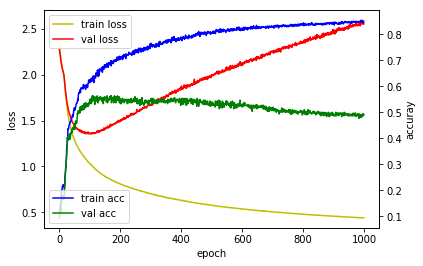

In [ ]:
# 0. 사용할 패키지 불러오기
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 사용자 정의 히스토리 클래스 정의
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []        
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        
# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리
x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋과 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)
x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 라벨데이터 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
custom_hist = CustomHistory()
custom_hist.init()

for epoch_idx in range(1000):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=10, validation_data=(x_val, y_val), callbacks=[custom_hist])

# 5. 학습과정 살펴보기
        
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(custom_hist.train_loss, 'y', label='train loss')
loss_ax.plot(custom_hist.val_loss, 'r', label='val loss')

acc_ax.plot(custom_hist.train_acc, 'b', label='train acc')
acc_ax.plot(custom_hist.val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

![png](http://tykimos.github.io/warehouse/2017-7-9-Training_Monitoring_output_19_1.png)

학습 모니터링 결과는 첫번째 예제와 유사하게 나옵니다.

---

### Q & A

Q1) 그래프가 어떻게 나와야 정상이죠?

A1) 데이터셋마다 모델마다 나오는 그래프가 다양합니다. 일반적으로는 에포크가 반복될수록 훈련 손실값을 계속 감소하고, 훈련 정확도는 계속 높아집니다. 훈련 정확도가 높을수록 과적합이 될 수 있기 때문에 반드시 모델이 좋다고는 얘기못하지만 반대로 에포크가 반복될수록 과적합이 일어나지 않는다면 훈련셋이나 모델 설계에 문제가 있을 수 있습니다. 즉 알고 있는 정답에 대해서도 제대로 학습이 안된다면, 훈련셋에 같은 입력인데도 다른 라벨값을 가지고 있다던지, 모델의 층이 낮거나 뉴런 수가 적어서 피팅이 제대로 안된다던지 등을 살펴봐야 합니다.

Q2) 과적합 된 이후에 검증셋의 정확도는 변화가 없는 것 같은데, 검증셋의 손실값은 왜 계속해서 증가되나요?

A2) 정확도 계산은 모델의 결과와 주어진 검증셋의 라벨값과 비교해서 계산됩니다. 이진분류로 예를 들어, 10개 샘플 중 10개 모두 맞으면 100%, 5개 맞으면 50%입니다. 모델은 에포크가 수행될 때마다 더욱더 훈련셋에 과적합되기 때문에 틀린 건 계속 틀리다고 얘기하고, 맞은 건 계속 맞다고 얘기합니다. 하지만 손실값인 경우에는 손실을 정의하는 함수에 따라 에러율이 계산되기 때문에 과적합되기 직전이 극소값이고 그 외에는 모두 증가합니다.

---

### 요약

딥러닝 모델 학습과정을 살펴보는 방법에 대해서 알아보았습니다. 간단하게는 케라스의 fit() 함수에서 반환하는 히스토리 객체를 이용하는 방법이 있고, 텐서보드라는 훌륭한 가시화 툴을 이용해서 보는 방법도 알아보았습니다. 또한 순환신경망 모델과 같이 기본적으로 제공하는 기능으로 모니터링이 안되는 경우 콜백함수를 직접 정의해서 사용하는 방법에 대해서도 알아보았습니다.

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/lecture/)
* 이전 : [학습과정 이야기](https://tykimos.github.io/2017/03/25/Fit_Talk/)
* 다음 : [학습 조기종료 시키기](https://tykimos.github.io/2017/07/09/Early_Stopping/)